In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ConvNet import ConvLayer, ConvNet, FlattenLayer, DenseLayer
from keras.datasets import mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

train_shuffle = np.random.permutation(len(X_train)).reshape(-1, 1)
X_train = X_train[train_shuffle]
Y_train = Y_train[train_shuffle]

X_train = X_train.reshape(-1, 1, 28, 28) / 255.0
X_test  = X_test.reshape(-1, 1, 28, 28)  / 255.0
Y_train = tf.keras.utils.to_categorical(Y_train).T
Y_test  = tf.keras.utils.to_categorical(Y_test).T

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 1, 28, 28), (10000, 1, 28, 28), (10, 60000), (10, 10000))

In [3]:
net = ConvNet()
net.add(ConvLayer(num_filters = 8, filter_size = 3, stride = 1, mode = 'same'))
net.add(ConvLayer(num_filters = 8, filter_size = 3, stride = 2, mode = 'valid'))
net.add(FlattenLayer())
net.add(DenseLayer(num_units = 10, activation='softmax'))
hist_loss, hist_acc = net.fit(X_train[:6016], Y_train[:, :6016], num_epochs = 10, learning_rate = 5e-3)

[Epoch  1/10] - [=============================>] - loss: 3.0888 - train_accuracy: 0.4036
[Epoch  2/10] - [=============================>] - loss: 2.8097 - train_accuracy: 0.7071
[Epoch  3/10] - [=============================>] - loss: 2.6438 - train_accuracy: 0.7570
[Epoch  4/10] - [=============================>] - loss: 2.5568 - train_accuracy: 0.7746
[Epoch  5/10] - [=============================>] - loss: 2.5104 - train_accuracy: 0.7819
[Epoch  6/10] - [=============================>] - loss: 2.4727 - train_accuracy: 0.7851
[Epoch  7/10] - [=============================>] - loss: 2.4311 - train_accuracy: 0.7859
[Epoch  8/10] - [=============================>] - loss: 2.3839 - train_accuracy: 0.7896
[Epoch  9/10] - [=============================>] - loss: 2.3330 - train_accuracy: 0.7911
[Epoch 10/10] - [=============================>] - loss: 2.2805 - train_accuracy: 0.7937


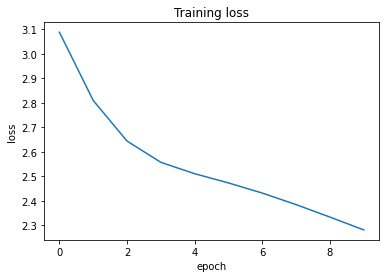

In [4]:
plt.plot(hist_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.show()

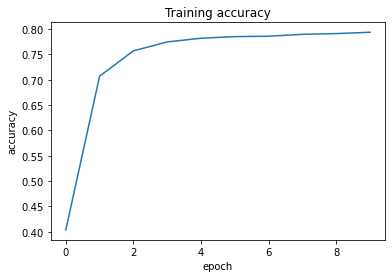

In [5]:
plt.plot(hist_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training accuracy')
plt.show()